# Определение перспективного тарифа для телеком компании
В данном исследовании будут изучены данные, касающиеся поведения абонентов телеком компании. В нем можно найти ответы на некоторые вопросы, которые позволяют определить наиболее перспективный тариф и оценить поведение пользователей, их предпочтения. Кроме того, будут обрисованы базовые тренды и будет дана их интерпретация.
<br>
## Содержание
<a id='Получение данных'></a>
<br>1. <a href='## Получение данных'>Получение данных</a> 
<a id='Анализ полученных данных'></a>
<br>2. <a href = '## Анализ полученных данных'>Анализ полученных данных</a>
<a id='Выводы о поведении абоенентов SMART'></a>
<br>2.1 <a href = '### Выводы о поведении абоенентов SMART'>Выводы о поведении абоенентов SMART</a>
<a id='Выводы о поведении абонентов ULTRA'></a>
<br>2.2 <a href = '### Выводы о поведении абонентов ULTRA'>Выводы о поведении абонентов ULTRA</a>
<a id='Сравнение двух тарифов'></a>
<br>2.3 <a href = '## Сравнение двух тарифов'>Сравнение двух тарифов</a>
<a id='Формулирование и проверка гипотез'></a>
<br>3. <a href = '## Формулирование и проверка гипотез'>Формулирование и проверка гипотез</a>
<a id='Выводы после проверки гипотез'></a>
<br>3.1 <a href = '## Выводы после проверки гипотез'>Выводы после проверки гипотез</a>
<a id='3.2 Удаление дубликатов'></a>
<br>3.2 <a href = '#3.2 Удаление дубликатов'>Удаление дубликатов</a>
<a id='Общий вывод'></a>
<br>4. <a href = '# Общий вывод'>Общий вывод</a>

## Получение данных

In [1]:
import pandas as pd 
try:
    calls = pd.read_csv(r'C:\Users\Семен\Desktop\DS\Проект 3\calls.csv')
    internet = pd.read_csv(r'C:\Users\Семен\Desktop\DS\Проект 3\internet.csv', index_col = 0)
    messages = pd.read_csv(r'C:\Users\Семен\Desktop\DS\Проект 3\messages.csv')
    tariffs = pd.read_csv(r'C:\Users\Семен\Desktop\DS\Проект 3\tariffs.csv')
    users = pd.read_csv(r'C:\Users\Семен\Desktop\DS\Проект 3\users.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv', index_col = 0)
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

calls.info()
internet.info()
messages.info()
tariffs.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns

### Чек-лист предобработки данных

#### calls
- [x] call_date - заменить формат object на дату.
- [x] duration - удалим строки с нулями по полю, так как пропущенные звонки никак не характеризуют поведение абонентов.
- [x] user_id - заменить на object, так как это качественная характеристика.
- [x] duration - округлить вверх.

#### internet
- [x] session_date - заменить формат object на дату.
- [x] user_id - заменить на object, так как это качественная характеристика.
- [x] mb_used - округлить вверх.

#### messages 
- [x] message_date - заменить формат object на дату.
- [x] user_id - заменить на object, так как это качественная характеристика.

#### users
- [x] churn_date - заменить тип object на дату.
- [x] churn_date - заполнить пропуски датами 01.01.1900, чтобы столбец был полностью типа даты.
- [x] user_id - заменить на object, так как это качественная характеристика.

In [2]:
import math 
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
users['churn_date'].fillna('1900-01-01')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

index_names = calls[calls['duration'] == 0].index
calls.drop(index_names, inplace = True)

calls['user_id'] = calls['user_id'].astype(str)
internet['user_id'] = internet['user_id'].astype(str)
messages['user_id'] = messages['user_id'].astype(str)
users['user_id'] = users['user_id'].astype(str)

calls['duration'] = calls['duration'].apply(math.ceil)
internet['mb_used'] = internet['mb_used'].apply(math.ceil)

calls.info()
internet.info()
messages.info()
tariffs.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFram

### Чек-лист добавления вычисляемых столбцов
- [x] Округлить все даты, кроме churn_date, до месяца
- [x] Расчитать количество сделанных звонков по каждому пользователю
- [x] Расчитать сумму израсходованных минут по каждому пользователю
- [x] Расчитать объем израсходованного интернет-трафика по каждому пользователю
- [x] Расчитать количество отправленных сообщений по месяцам
- [x] Объединить все данные
- [x] Расчитать помесячную выручку с каждого пользователя

In [3]:
calls['call_date'] = calls['call_date'].dt.to_period('M')
internet['session_date'] = internet['session_date'].dt.to_period('M')
messages['message_date'] = messages['message_date'].dt.to_period('M')

pivot_calls = calls.pivot_table(index = ['user_id', 'call_date'], values = 'duration', aggfunc = ['count', 'sum'])
pivot_calls.rename_axis(['user_id', 'date'], axis = 'index', inplace = True)
pivot_internet = internet.pivot_table(index = ['user_id', 'session_date'], values = 'mb_used', aggfunc = 'sum')
pivot_internet.rename_axis(['user_id', 'date'], axis = 'index', inplace = True)
pivot_messages = messages.pivot_table(index = ['user_id', 'message_date'], values = 'id', aggfunc = 'count')
pivot_messages.rename_axis(['user_id', 'date'], axis = 'index', inplace = True)

pivot = pivot_calls.merge(pivot_internet, on = ['user_id', 'date'])
pivot = pivot.merge(pivot_messages, on = ['user_id', 'date'])
pivot.set_axis(['calls', 'minutes', 'MB', 'messages'], axis = 'columns', inplace = True)
pivot.reset_index(level= ['date', 'user_id'], inplace = True)
pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 6 columns):
user_id     2662 non-null object
date        2662 non-null period[M]
calls       2662 non-null int64
minutes     2662 non-null int64
MB          2662 non-null int64
messages    2662 non-null int64
dtypes: int64(4), object(1), period[M](1)
memory usage: 124.9+ KB


/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [4]:
# ДОБАВЛЯЕМ НАЗВАНИЕ ТАРИФА И ИНФОРМАЦИЮ О НЕМ В ДАННЫЕ
def add_tariff(name):
    tariff = str(users[users['user_id'] == name]['tariff'].unique())
    return tariff

pivot['tariff_name'] = pivot['user_id'].apply(add_tariff)

pivot['tariff_name'].replace("['ultra']", 'ultra', inplace = True)
pivot['tariff_name'].replace("['smart']", 'smart', inplace = True)

pivot = pivot.merge(tariffs, on = 'tariff_name')

print(pivot.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2662 entries, 0 to 2661
Data columns (total 14 columns):
user_id                  2662 non-null object
date                     2662 non-null period[M]
calls                    2662 non-null int64
minutes                  2662 non-null int64
MB                       2662 non-null int64
messages                 2662 non-null int64
tariff_name              2662 non-null object
messages_included        2662 non-null int64
mb_per_month_included    2662 non-null int64
minutes_included         2662 non-null int64
rub_monthly_fee          2662 non-null int64
rub_per_gb               2662 non-null int64
rub_per_message          2662 non-null int64
rub_per_minute           2662 non-null int64
dtypes: int64(11), object(2), period[M](1)
memory usage: 312.0+ KB
None


In [5]:
# СЧИТАЕМ ВЫРУЧКУ ПО КАЖДОМУ ПОЛЬЗОВАТЕЛЮ В КАЖДЫЙ МЕСЯЦ
def revenue(row):
    revenue = row['rub_monthly_fee']
    if row['MB'] > row['mb_per_month_included']:
        revenue += (row['MB'] - row['mb_per_month_included']) * row['rub_per_gb'] / 1024
    if row['minutes'] > row['minutes_included']:
        revenue += (row['minutes'] - row['minutes_included']) * row['rub_per_minute']
    if row['messages'] > row['messages_included']:
        revenue += (row['messages'] - row['messages_included']) * row['rub_per_message']
    return round(revenue, 2)
pivot['revenue'] = pivot.apply(revenue, axis = 1)
data = pivot
data = data.merge(users, on = 'user_id')
display(data.head(20))

,user_id,date,calls,minutes,MB,messages,tariff_name,messages_included,mb_per_month_included,minutes_included,...,rub_per_message,rub_per_minute,revenue,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05,17,159,2256,22,ultra,1000,30720,3000,...,1,1,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06,28,172,23257,60,ultra,1000,30720,3000,...,1,1,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07,41,340,14016,75,ultra,1000,30720,3000,...,1,1,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08,42,408,14070,81,ultra,1000,30720,3000,...,1,1,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09,46,466,14581,57,ultra,1000,30720,3000,...,1,1,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,2018-10,44,350,14717,73,ultra,1000,30720,3000,...,1,1,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,2018-11,37,338,14768,58,ultra,1000,30720,3000,...,1,1,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,2018-12,38,333,9827,70,ultra,1000,30720,3000,...,1,1,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1003,2018-08,43,380,8571,37,ultra,1000,30720,3000,...,1,1,1950.0,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
9,1003,2018-09,105,961,12479,91,ultra,1000,30720,3000,...,1,1,1950.0,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra


## Анализ полученных данных
После сделанных шагов в предобработке данных и подготовке показателей для анализа мы переходим непосредственно к получению нужной информации. Начнем с исследования поведения пользователей разных тарифов.
#### Чек-лист анализа данных
- [x] Построить гистограммы использования интернета, минут и СМС для абонентов Smart
- [x] Построить гистограммы использования интернета, минут и СМС для абонентов Ultra
- [x] Получить статистические показатели (мат. ожидание, стандартное отклонение, дисперсию) для каждого из распределений
- [x] Сделать первые выводы после анализа
### Тариф SMART

count    1913.000000
mean      421.475170
std       187.316129
min         2.000000
25%       288.000000
50%       427.000000
75%       547.000000
max      1435.000000
Name: minutes, dtype: float64
Дисперсия: 35087.3321498796


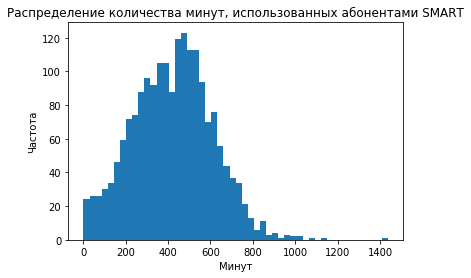

In [6]:
data[data['tariff_name'] == 'smart']['minutes'].plot(kind = 'hist', title = 'Распределение количества минут, использованных абонентами SMART', bins = 50).set(xlabel = 'Минут', ylabel = 'Частота')
print(data[data['tariff_name'] == 'smart']['minutes'].describe())
print('Дисперсия:', data[data['tariff_name'] == 'smart']['minutes'].var())

#### Промежуточный вывод
- Распределение близко к нормальному, немного смещено влево из-за большого количества людей, мало говорящих по телефону
- Стандартное отклонение равно примерно половине мат. ожидания: рапсределение неплотное
- Медиана примерно равна среднему, так как "хвосты" есть с обеих сторон

count    1913.000000
mean       38.767904
std        26.822570
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messages, dtype: float64
Дисперсия: 719.450287287815


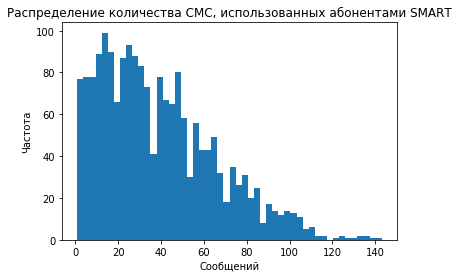

In [7]:
data[data['tariff_name'] == 'smart']['messages'].plot(kind = 'hist', title = 'Распределение количества СМС, использованных абонентами SMART', bins = 50).set(xlabel = 'Сообщений', ylabel = 'Частота')
print(data[data['tariff_name'] == 'smart']['messages'].describe())
print('Дисперсия:', data[data['tariff_name'] == 'smart']['messages'].var())

#### Промежуточный вывод
- Распределение, напоминающее нормальное, смещенное сильно влево
- О нормальности нам говорит только тот факт, что среднее и медиана близки по своим значениям к включенному в тариф количеству СМС
- Очень большой "хвост" справа
- Стандартное отклонение велико (70% мат. ожидания), что говорит о неплотном распределении.

count     1913.000000
mean     16267.654992
std       5800.039133
min          0.000000
25%      12641.000000
50%      16484.000000
75%      20068.000000
max      38610.000000
Name: MB, dtype: float64
Дисперсия: 33640453.94262282


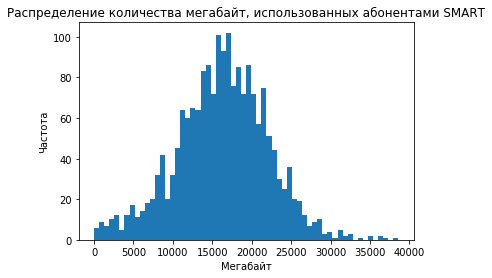

In [8]:
data[data['tariff_name'] == 'smart']['MB'].plot(kind = 'hist', title = 'Распределение количества мегабайт, использованных абонентами SMART', bins = 60).set(xlabel = 'Мегабайт', ylabel = 'Частота')
print(data[data['tariff_name'] == 'smart']['MB'].describe())
print('Дисперсия:', data[data['tariff_name'] == 'smart']['MB'].var())

#### Промежуточные выводы
- Распределение более остальных похоже на нормальное, незначительное смещение влево
- Стандартное отклонение равно примерно 35% мат. ожидания, распределение средней плотности
- Медиана примерно равна среднему
- Что интересно, больше половины пользователей превышают месячную норму

### Выводы о поведении абоенентов SMART
- Чаще всего абонентам хватает месчного пакета минут. Только в 25% случаев абонент вынужден оплачивать дополнительные минуты.
- С СМС примерно такая же ситуация: в основном, люди пишут мало СМС. Однако тут уже выделяется категория людей, которые пишут их в бОльших количествах, чем большинство. Если посмотреть на распределение внимательно, можно увидеть несколько "ям", после которых идут "пики" - видны группы.
- Интернета большей части людей не хватает. В то же время, есть категория людей, которые совсем мало пользуются мобильным интернетом - они и смещают распределение влево.
### Тариф ULTRA

count     749.000000
mean      559.088117
std       310.483214
min         1.000000
25%       333.000000
50%       539.000000
75%       761.000000
max      1673.000000
Name: minutes, dtype: float64
Дисперсия: 96399.8264495263


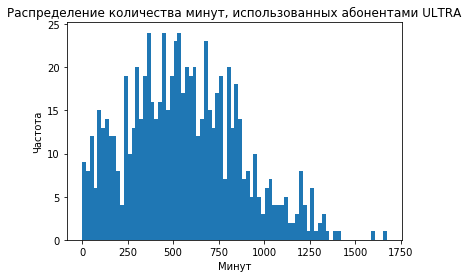

In [9]:
data[data['tariff_name'] == 'ultra']['minutes'].plot(kind = 'hist', title = 'Распределение количества минут, использованных абонентами ULTRA', bins = 80).set(xlabel = 'Минут', ylabel = 'Частота')
print(data[data['tariff_name'] == 'ultra']['minutes'].describe())
print('Дисперсия:', data[data['tariff_name'] == 'ultra']['minutes'].var())

#### Промежуточные выводы
- Распределение, сходное с нормальным, смещено влево.
- Мат. ожидание равно примерно двум стандартынм отклонениям - распределение неплотное.
- Медиана и мат. ожидание близки по своим значениям из-за большого количества выбросов с обеих сторон.
- Никто не использует все 3000 минут. 99% не использует и половины.

count    749.000000
mean      61.279039
std       44.538133
min        1.000000
25%       25.000000
50%       52.000000
75%       88.000000
max      224.000000
Name: messages, dtype: float64
Дисперсия: 1983.6452953313865


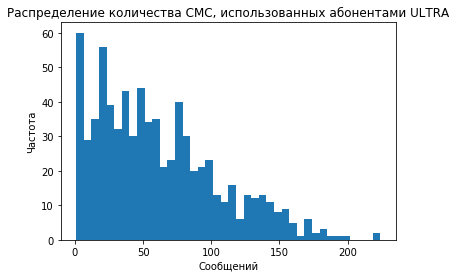

In [10]:
data[data['tariff_name'] == 'ultra']['messages'].plot(kind = 'hist', title = 'Распределение количества СМС, использованных абонентами ULTRA', bins = 40).set(xlabel = 'Сообщений', ylabel = 'Частота')
print(data[data['tariff_name'] == 'ultra']['messages'].describe())
print('Дисперсия:', data[data['tariff_name'] == 'ultra']['messages'].var())

#### Промежуточные выводы
- Распределение похоже на нормальное, сильно смещенное влево.
- Длинный хвост справа, но высокая плотность слева.
- Никто не использует и четверти выделенного количества СМС. Большинство не использует и десятой его части.
- Видимо, абоненты ULTRA идут не за количеством СМС.

count      749.00000
mean     19601.94259
std       9654.38538
min          0.00000
25%      11884.00000
50%      19457.00000
75%      26863.00000
max      49789.00000
Name: MB, dtype: float64
Дисперсия: 93207157.05686012


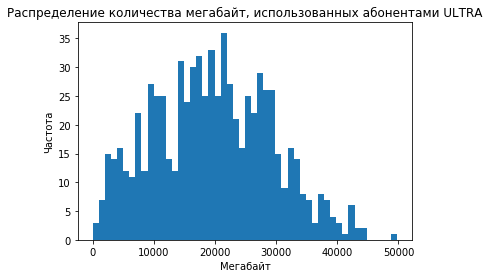

In [11]:
data[data['tariff_name'] == 'ultra']['MB'].plot(kind = 'hist', title = 'Распределение количества мегабайт, использованных абонентами ULTRA', bins = 50).set(xlabel = 'Мегабайт', ylabel = 'Частота')
print(data[data['tariff_name'] == 'ultra']['MB'].describe())
print('Дисперсия:', data[data['tariff_name'] == 'ultra']['MB'].var())

#### Промежуточные выводы
- Распределение нормальное, немного смещенное вправо.
- Стандартное отклонение примерно равно половине мат. ожидания - распределение неплотное.
- Большинство не использует весь пакет интернета.

### Выводы о поведении абонентов ULTRA
- Очень небольшая часть абонентов испольует весь предоставленный пакет интернета, СМС и звонков.
- Однако, вероятно, ключевую роль все же играет количество предлагаемых мегабайт - его пользователи используют больше СМС и минут.

## Сравнение двух тарифов

Конечно, абоненты ULTRA используют больше мегабайт, СМС и минут, чем абоненты SMART. Однако эта разница много меньше, чем разница предлагаемых пакетов внутри тарифов. Иными словами: SMART-ам не хватает, а ULTRA-м многовато. <br>

Наиболее активно используемый пакет - интернет. В SMART-е большинству не хватает. Вероятно, именно поэтому люди платят за ULTRA, не смотря на то, что два других пакета они вряд ли используют полностью. Судя по распределениям, оптимальное колиечество интернета в пакете - 25 000 МБ.<br>

Однако большининство остается за SMART-ом. Не было бы лучше сделать тариф, где интернета много, но не так много как в ULTRA, а СМС и минут мало, но не так мало, как в SMART.<br> 

Поведение абонентов говорит "Нам не нравится ни один тариф. Мы готовы платить больше, чем за SMART, но не в 4 раза же. Нам важен интернет! Остальное можно увеличить совсем чуть-чуть относительно SMART-а"

## Формулирование и проверка гипотез
### Гипотеза 1: Средние месячные выручки пользователей тарифов SMART и ULTRA различаются.
Нулевая гипотеза: выручки равны. <br>
Альтернативная гипотеза: выручки различаются.
### Гипотеза 2: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Нулевая гипотеза: не отличается. <br>
Альтернативная гипотеза: отличается.

In [12]:
# ПРОВЕРКА ПЕРВОЙ ГИПОТЕЗЫ
import numpy as np
from scipy import stats as st
stat_ultra = data[data['tariff_name'] == 'ultra'].pivot_table(index = 'user_id', values = 'revenue', aggfunc = 'mean')
stat_ultra = stat_ultra.reset_index()['revenue']
stat_smart = data[data['tariff_name'] == 'smart'].pivot_table(index = 'user_id', values = 'revenue', aggfunc = 'mean')
stat_smart = stat_smart.reset_index()['revenue']
alpha = 0.1
if stat_ultra.var()/stat_smart.var() < 1.05 and stat_ultra.var()/stat_smart.var() > 0.95:
    equality = True
else:
    equality = False
results = st.ttest_ind(stat_ultra, stat_smart, equal_var = equality)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 2.539277507982178e-52
Отвергаем нулевую гипотезу


In [13]:
# ПРОВЕРКА ВТОРОЙ ГИПОТЕЗЫ
stat_moscow = data[data['city'] == 'Москва'].pivot_table(index = 'user_id', values = 'revenue', aggfunc = 'mean')['revenue']
stat_moscow = stat_moscow.reset_index()['revenue']
stat_others = data[data['city'] != 'Москва'].pivot_table(index = 'user_id', values = 'revenue', aggfunc = 'mean')['revenue']
stat_others = stat_others.reset_index()['revenue']
if stat_moscow.var()/stat_others.var() < 1.05 and stat_moscow.var()/stat_others.var() > 0.95:
    equality = True
else:
    equality = False
results2 = st.ttest_ind(stat_moscow, stat_others, equal_var = equality)
alpha = 0.15
print('p-value:', results2.pvalue)
if (results2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.7936919073699545
Не получилось отвергнуть нулевую гипотезу


In [14]:
# ПОСМОТРИМ НА РЕАЛЬНЫЕ ЗНАЧЕНИЯ СРЕДНИХ
pivot_tariffs = data.pivot_table(index = 'user_id', columns = 'tariff_name', values = 'revenue', aggfunc = 'mean').mean()
display(pivot_tariffs)

def moscow_others(city):
    if city == 'Москва':
        return 'moscow'
    else:
        return 'others'
data['city_category'] = data['city'].apply(moscow_others)
pivot_cities = data.pivot_table(index = 'user_id', columns = 'city_category', values = 'revenue', aggfunc = 'mean').mean()
display(pivot_cities)

tariff_name
smart    1282.246897
ultra    2058.098254
dtype: float64

city_category
moscow    1483.572226
others    1504.922812
dtype: float64

## Выводы после проверки гипотез
- Средние месячные выручки абонентов ULTRA и SMART, судя по результатам проверки гипотез, отличаются, причем p-value равно нулю (выручки не равны от слова "совсем"). Средние по столбцам сводной таблицы подтверждают релевантность результатов теста.
- Средние месячные выручки Москвичей и жителей других городов, судя по результатам проверки гипотез, отличаются не слишком сильно (не получилось отвергуть гипотезу о равенстве средних выручек). Примерно эту же картину мы видим и на таблице средних: 1040 рублей для Москвичей и 940 для других городов.
##### 1) Нет большой разницы, из Москвы человек или из другого города, когда речь идет о среднемесячной выручке на одного пользователя
##### 2) А вот тариф очень сильно влияет на этот показатель: среднемесячные выручки абонентов ULTRA и SMART отличаются, притом критически.


revenue
date    tariff_name           
2018-01 smart         21590.42
        ultra         13650.00
2018-02 smart         40028.54
        ultra         27853.13
2018-03 smart         74511.77
        ultra         50235.21
2018-04 smart         88075.05
        ultra         74574.61
2018-05 smart        142669.74
        ultra         96712.36
2018-06 smart        163117.95
        ultra        126846.67
2018-07 smart        203933.34
        ultra        140851.61
2018-08 smart        261543.96
        ultra        165881.25
2018-09 smart        268390.24
        ultra        177820.76
2018-10 smart        330988.70
        ultra        199714.01
2018-11 smart        345025.15
        ultra        221189.95
2018-12 smart        421763.05
        ultra        233500.50

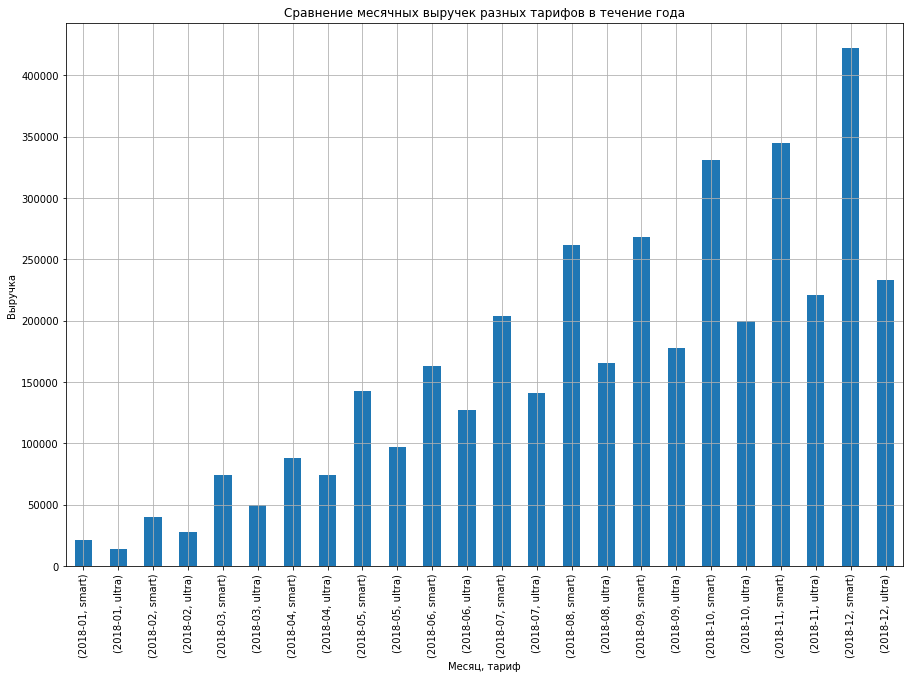

In [15]:
pivot_for_bar = data.sort_values(by = 'date').pivot_table(index = ['date', 'tariff_name'], values = 'revenue', aggfunc = 'sum')

pivot_for_bar.plot.bar(legend = False, title = 'Сравнение месячных выручек разных тарифов в течение года', figsize = (15, 10), grid = True).set(xlabel = 'Месяц, тариф', ylabel = 'Выручка')
display(pivot_for_bar)

# Общий вывод
### 1) Поведение пользователей
- Самый используемый пакет - интернет.
- Остальные пакеты в ULTRA - сильно избыточны, в SMART - достаточны.
- Люди платят больше исключительно за увеличенный пакет интернета.

### 2) Выручка 
#### 2.1) Выручка на человека
- Неважно: Москва или нет.
- Важно: SMART или ULTRA.

#### 2.2) Выручка на всех пользователей по тарифу

- В течение всего 2018 растет выручка ULTRA.
- SMART тоже растет, но ULTRA бастрее - разрыв увеличивается.

### 3) Дополнительный комментарий
И SMART и ULTRA резко перестали бы быть популярными, если бы были предложены тарифы, реально отражающие потребности различных групп. Если рассматриваем ситуацию в вакууме, то, конечно, ULTRA - самый перспективный тариф. НО в реальной жизни есть конкуренты, то есть человек уходит, если ему что-то нравится. <br>
